In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
stroke_data = pd.read_csv('stroke-data.csv')

In [3]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke_data.shape

(5110, 12)

In [5]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
cols_to_exclude = ['id', 'age', 'avg_glucose_level', 'bmi']
for i in stroke_data.columns:
    if i not in cols_to_exclude:
        stroke_data[i] = stroke_data[i].astype('category')

In [7]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


In [8]:
stroke_data.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [9]:
stroke_data.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

# Exploratory Data Analysis

## Univariate Analysis

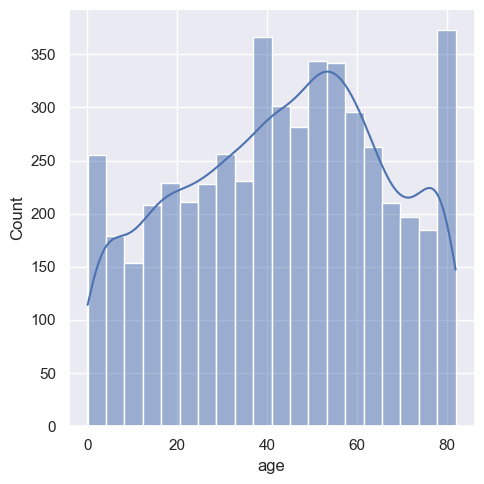

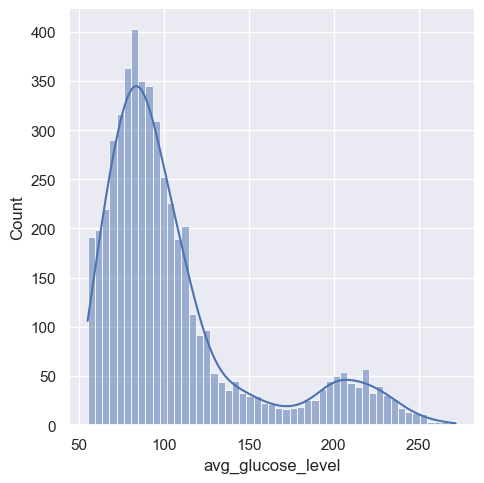

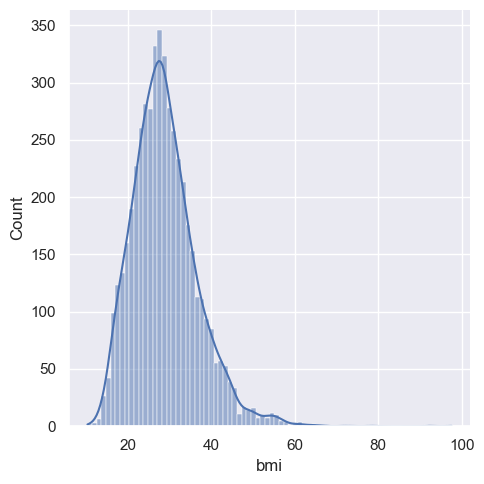

In [10]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    sns.displot(data=stroke_data[col], kde= True)
    plt.show()

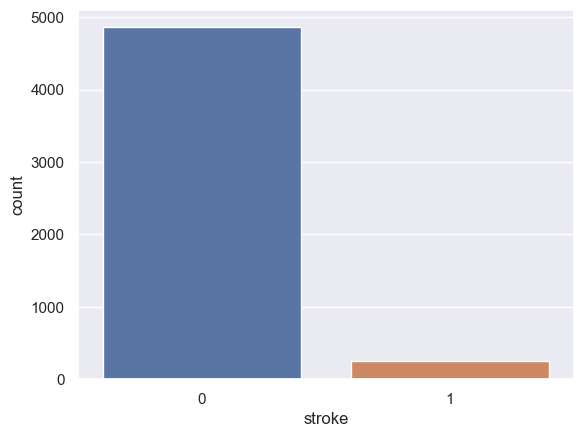

In [11]:
sns.countplot(x ='stroke', data = stroke_data)
plt.show()

#### This seems problematic from the outset as the dataset is imbalanced. 249 / 5110 means less than 5% of all our data contains people who've actually had a stroke. That means the machine could predict "no_stroke" for every guess and still achieve around 95% accuracy. At this point in real life, I would contact whoever had given me the data and ask if they had more data available on patients who've had a stroke. I want to incorporate more stroke data to offset the imbalance and more accurately make predictions with my machine learning model. Since this is just a project for fun, I'm going to ignore this glaring error.

## Bivariate Analysis

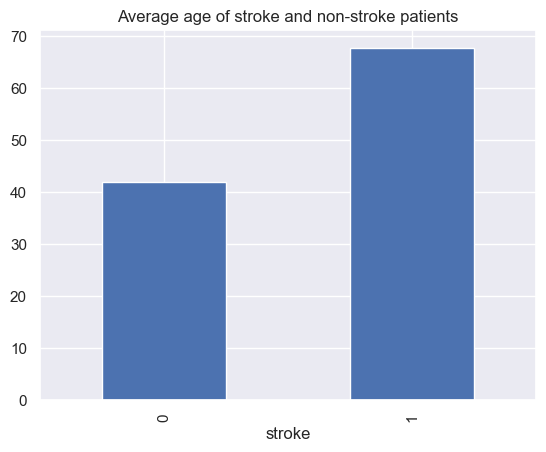

In [12]:
stroke_data.groupby('stroke')['age'].mean().plot(kind='bar')
plt.title('Average age of stroke and non-stroke patients')
plt.show()

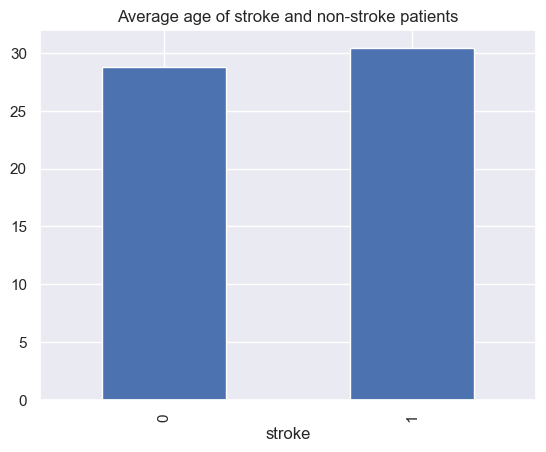

In [13]:
stroke_data.groupby('stroke')['bmi'].mean().plot(kind='bar')
plt.title('Average age of stroke and non-stroke patients')
plt.show()

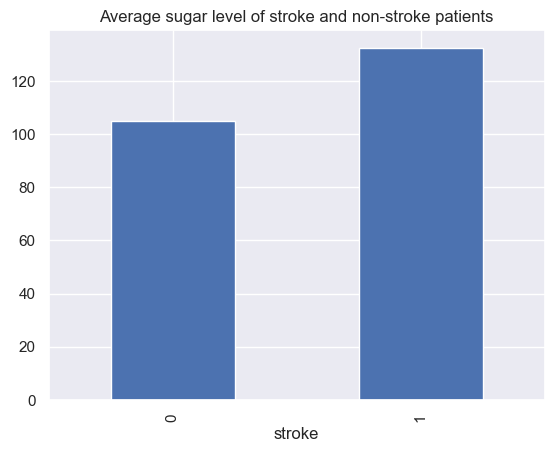

In [14]:
stroke_data.groupby('stroke')['avg_glucose_level'].mean().plot(kind='bar')
plt.title('Average sugar level of stroke and non-stroke patients')
plt.show()

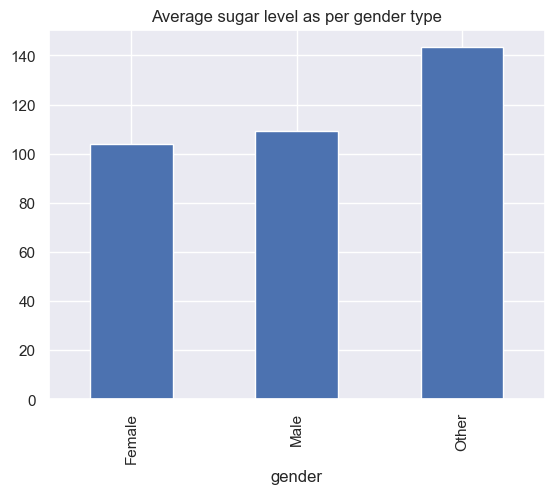

In [15]:
stroke_data.groupby('gender')['avg_glucose_level'].mean().plot(kind='bar')
plt.title('Average sugar level as per gender type')
plt.show()

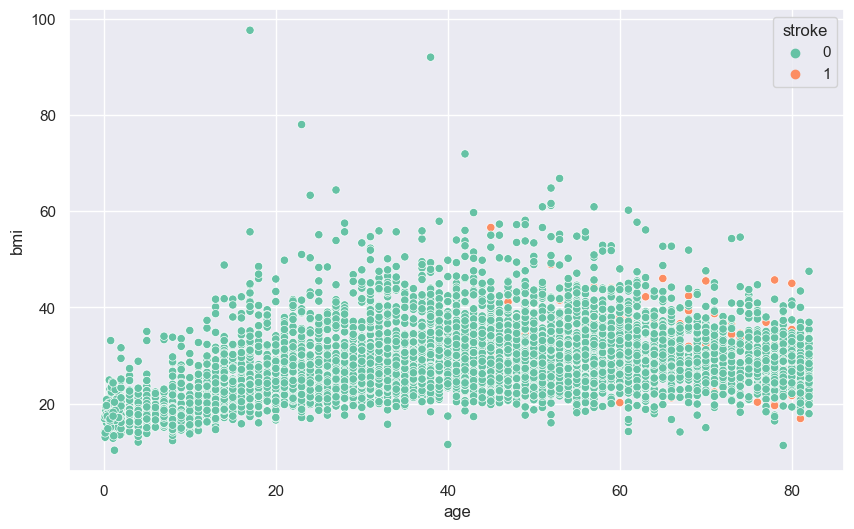

In [16]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x = 'age', y = 'bmi', hue= 'stroke', data=stroke_data, palette='Set2')